In [3]:
import pandas as pd
csv_in='quiz/mixture.csv'
df=pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


,X,Y
0,0.587460,7.901551
1,-5.019304,-4.876149
2,-6.505591,-2.445019
3,0.772204,3.574519
4,-5.790933,-3.226195


In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

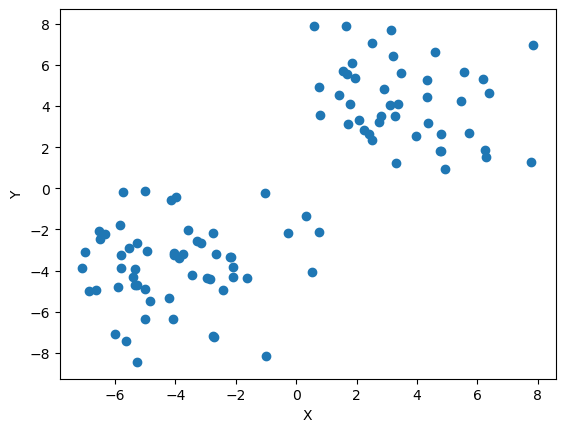

In [5]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
scaled_data = scale(df[['X', 'Y']])

C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

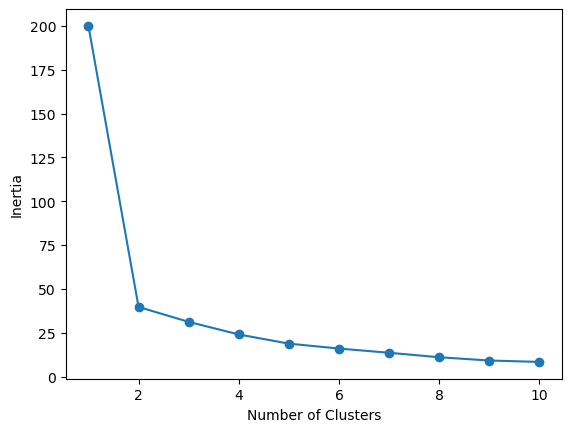

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_data)

C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [11]:
cluster0_count = sum(kmeans.labels_ == 0)
print("クラスタ0に含まれるデータ数:", cluster0_count)

クラスタ0に含まれるデータ数: 56


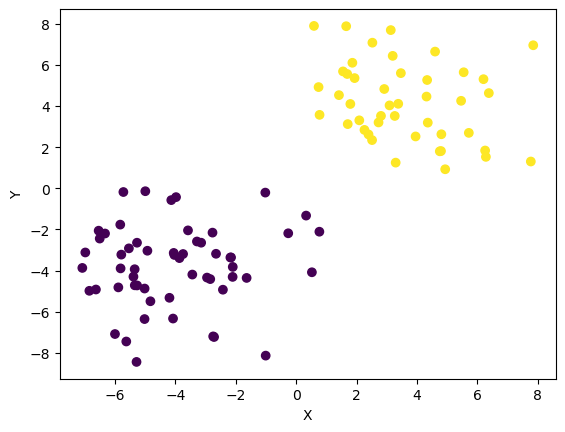

In [12]:
plt.scatter(df['X'], df['Y'], c=kmeans.labels_)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()